## Name: Parthav Joshi
## Roll No: C045


## Aim: Implement K means clustering and analyse the effect of varying the number of clusters.

In [13]:
# packages
import pandas as pd 
import numpy as np 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [18]:
train_path = './exp4/USA_Housing.csv'

data = pd.read_csv(train_path)

display(data.head())
display(data.shape)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


(5000, 7)

In [21]:
data.sort_values("Avg. Area Income")

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05,"9932 Eric Circles\nLake Martha, WY 34611-6127"
3069,35454.714659,6.855708,6.018647,4.50,59636.402553,1.077806e+06,Unit 4700 Box 1880\nDPO AP 18074
2092,35608.986237,6.935839,7.827589,6.35,20833.007623,4.493316e+05,"652 Stanton Island\nAdamsview, VA 56957-9960"
4855,35797.323122,5.544221,7.795138,5.00,24844.200190,2.998630e+05,"645 Mary Radial\nEast Roberto, CA 23652-5430"
1459,35963.330809,3.438547,8.264122,3.28,24435.777302,1.430274e+05,"166 Terry Grove\nSouth Michaelhaven, PR 18054"
...,...,...,...,...,...,...,...
2719,101599.670580,7.798746,7.480512,6.39,37523.864670,2.370231e+06,"52280 Steven Street\nRobertchester, IA 40405-0504"
962,101928.858060,4.829586,9.039382,4.08,22804.991935,1.938866e+06,"856 Harris Centers Suite 940\nNicholasport, IL..."
3541,102881.120902,6.471249,5.693536,3.12,21051.531294,1.754938e+06,"784 Arnold Prairie Apt. 787\nJamesside, NM 04270"
1734,104702.724257,5.575523,6.932106,3.22,22560.527135,1.742432e+06,"14230 Douglas River Suite 570\nConniechester, ..."


In [28]:
data.shape
data.drop('Address', inplace = True, axis =1)

In [29]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [33]:
#Considering only 2 features
X= data.iloc[:, [0,1,2,3,4]].values

In [41]:
# Using algorithm ELKAN
kmeans1 = KMeans(n_clusters= 8, max_iter = 100, random_state= 42, algorithm = "elkan") 
y_kmeans1 = kmeans1.fit_predict(X)

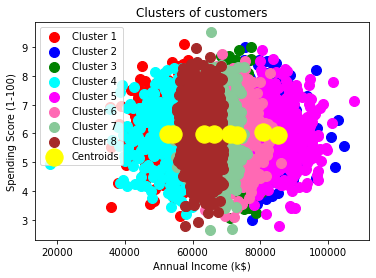

In [42]:
plt.scatter(X[y_kmeans1 == 0, 0], X[y_kmeans1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans1 == 1, 0], X[y_kmeans1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans1 == 2, 0], X[y_kmeans1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans1 == 3, 0], X[y_kmeans1 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans1 == 4, 0], X[y_kmeans1 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans1 == 5, 0], X[y_kmeans1 == 5, 1], s = 100, c = 'hotpink', label = 'Cluster 6')
plt.scatter(X[y_kmeans1 == 6, 0], X[y_kmeans1 == 6, 1], s = 100, c = '#88c999', label = 'Cluster 7')
plt.scatter(X[y_kmeans1 == 7, 0], X[y_kmeans1 == 7, 1], s = 100, c = 'brown', label = 'Cluster 8')
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [43]:
# using default algorithm - LLOYD
kmeans2 = KMeans(n_clusters= 5, max_iter = 10, random_state= 42) 
y_kmeans2 = kmeans2.fit_predict(X)

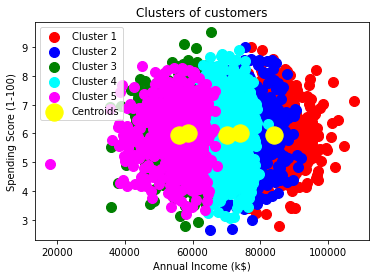

In [44]:
plt.scatter(X[y_kmeans2 == 0, 0], X[y_kmeans2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans2 == 1, 0], X[y_kmeans2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans2 == 2, 0], X[y_kmeans2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans2 == 3, 0], X[y_kmeans2 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans2 == 4, 0], X[y_kmeans2 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(X[y_kmeans2 == 5, 0], X[y_kmeans2 == 5, 1], s = 100, c = 'hotpink', label = 'Cluster 6')
# plt.scatter(X[y_kmeans2 == 6, 0], X[y_kmeans2 == 6, 1], s = 100, c = '#88c999', label = 'Cluster 7')
# plt.scatter(X[y_kmeans2 == 7, 0], X[y_kmeans2 == 7, 1], s = 100, c = 'brown', label = 'Cluster 8')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [45]:
print(kmeans1.cluster_centers_)

[[5.27706568e+04 5.97970920e+00 7.00453654e+00 3.91031111e+00
  2.94322553e+04]
 [8.07565547e+04 6.04018596e+00 7.04389078e+00 4.04979008e+00
  2.57642301e+04]
 [7.31746367e+04 5.94836179e+00 6.98327088e+00 4.00496141e+00
  3.59524694e+04]
 [5.40526237e+04 5.98420723e+00 7.03340042e+00 3.87831897e+00
  4.64899730e+04]
 [8.52452582e+04 5.96132684e+00 6.89248752e+00 3.99334737e+00
  4.18760990e+04]
 [7.09913726e+04 5.96852541e+00 6.98403277e+00 3.91881789e+00
  5.01651730e+04]
 [6.64085265e+04 5.99619476e+00 6.96122544e+00 3.99748159e+00
  2.32218176e+04]
 [6.32903033e+04 5.96457588e+00 7.00112732e+00 4.03265143e+00
  3.75202423e+04]]


In [46]:
print(kmeans2.cluster_centers_)

[[8.41015425e+04 5.96033643e+00 6.91755226e+00 3.95892758e+00
  4.00556978e+04]
 [7.40595248e+04 6.00124403e+00 6.98723360e+00 4.01277729e+00
  2.59142020e+04]
 [5.85675386e+04 6.00417875e+00 6.97595092e+00 4.00822831e+00
  2.96853839e+04]
 [7.01601176e+04 5.95894628e+00 7.02148865e+00 3.97552053e+00
  4.28752569e+04]
 [5.59035787e+04 5.94776659e+00 7.01445058e+00 3.92019174e+00
  4.63104454e+04]]


In [47]:
# Spread of the data
np.std(X)

28384.610413536993

In [49]:
# using default algorithm - LLOYD - No. of clusters 8
kmeans2 = KMeans(n_clusters= 8, max_iter = 10, random_state= 42) 
y_kmeans2 = kmeans2.fit_predict(X)

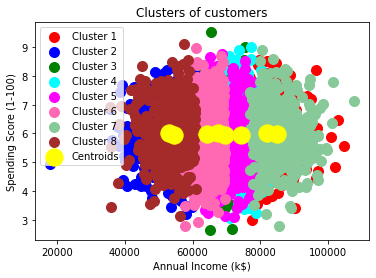

In [50]:
plt.scatter(X[y_kmeans2 == 0, 0], X[y_kmeans2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans2 == 1, 0], X[y_kmeans2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans2 == 2, 0], X[y_kmeans2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans2 == 3, 0], X[y_kmeans2 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans2 == 4, 0], X[y_kmeans2 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans2 == 5, 0], X[y_kmeans2 == 5, 1], s = 100, c = 'hotpink', label = 'Cluster 6')
plt.scatter(X[y_kmeans2 == 6, 0], X[y_kmeans2 == 6, 1], s = 100, c = '#88c999', label = 'Cluster 7')
plt.scatter(X[y_kmeans2 == 7, 0], X[y_kmeans2 == 7, 1], s = 100, c = 'brown', label = 'Cluster 8')
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
